Problem 2 : Implements a method with unsupervised selection of the centers. Select the centers randomly on the P
points of the training set or my a cluster algorithm. Choose the weights by minimizing the convex quadratic function.

\vspace{5mm}
In this problem we must to choose the centers that are the most important points for my dataset.
I can use the K-Means algorithm that minimize the euclidean distance between the centers and points for
every cluster. Also we'll choose a-priori the number of clusters K (consequently the number of clusters center) and that it is an unsupervised learning algorithm because the response y doesn't enter in the optimization procedure.
The problem is that K-Means is NP-hard and it's really difficult find the absolute optimal solution in reasonable time.
So now i'll find the centers of my dataset.
\vspace{5mm}

In [2]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from sklearn import cluster
from sklearn.cluster import KMeans
from __future__ import division
from scipy.cluster.vq import kmeans,vq
from scipy.optimize import minimize
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import time

In [3]:
def plot_(estimated_y):
    X1 = np.arange(0, 1, 0.01)
    X2 = np.arange(0, 1, 0.01)
    X1,X2 = np.meshgrid(X1,X2)   
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X1,X2,estimated_y , rstride=1, cstride=1,cmap=cm.coolwarm,linewidth=0.01)
    plt.show() 
    return '.'

In [40]:
x1 = np.array([0.9958353402931972, 0.42873694033293397, 0.19217723679077281, 0.71488612997180501, 0.46383126295458199, 0.66974426930329678, 0.066263559118869719, 0.9480058493985315, 0.8293286102121662, 0.18373413163159513, 0.53388220408344977, 0.50324073738249198, 0.76293008039041421, 0.47594723537549088, 0.31172453928619837, 0.61924547015284037, 0.10050134386745091, 0.22260868754229723, 0.35001463623734963, 0.14627717939709295, 0.12496220086685006, 0.77930601347322903, 0.2103113176292718, 0.24387419293013968, 0.23980391985165261, 0.044104757632617675, 0.24483640371542925, 0.96208003929206942, 0.11654413690220777, 0.63143705587409138, 0.060624912194398695, 0.88528551201238537, 0.66895473507556358, 0.42009504181562651, 0.87836160667763197, 0.98322978377675474, 0.6504574724668154, 0.11173592920727737, 0.80141779681303438, 0.13852022417094023, 0.70831228979926153, 0.46300211406841951, 0.44286814519774853, 0.17816460503737608, 0.70472978047986978, 0.57365570952802869, 0.20460602506944792, 0.73378735785721394, 0.95952905903893937, 0.91444372653530392, 0.13372498902170327, 0.94690255416025471, 0.24680129260237649, 0.30989562230781176, 0.65520402087345087, 0.56734498327988336, 0.48986591808406166, 0.85857360617446621, 0.84417203687668374, 0.79265792667341706, 0.84666666473554852, 0.82166351845466745, 0.64784553968701897, 0.91999327127869979, 0.12343924287994767, 0.13062537386951478, 0.98070842831461258, 0.71972856479671987, 0.20037551706588619, 0.027716634803678142, 0.85100602533015657, 0.42124744217495913, 0.21816056776889992, 0.57183349251745408, 0.22996555257457729, 0.069783068851780095, 0.5196544851659386, 0.05847822492603294, 0.56595413408932282, 0.10374195592804847, 0.90363009104415926, 0.78348967124635716, 0.52877806758043822, 0.52815167044008426, 0.97559835113345006, 0.67329543789784951, 0.68521577188286609, 0.46924807604035157, 0.17886471170296414, 0.68547369826537852, 0.91820133362930689, 0.48044285978367574, 0.32368080175862668, 0.56738241760500896, 0.7507906579182293, 0.37467746496173637, 0.85630638169587481, 0.82542188504330716, 0.87175400731606334, 0.10693823146415216])

x2 = np.array([0.94397468321531419, 0.84936195002221571, 0.88835416982021786, 0.3351395850229697, 0.97549891609392081, 0.72119695695406094, 0.4939274745463702, 0.77125797617766345, 0.28647300867990189, 0.16863131914855933, 0.49356323038788341, 0.9303842603683905, 0.66803239253919533, 0.65631681110241225, 0.76688456488126211, 0.44684204168158359, 0.78656157786170477, 0.04884277732237885, 0.90946336297546815, 0.16870364522268033, 0.4720782381382822, 0.30536511395253729, 0.42516254747015925, 0.81855813831250035, 0.32866687571563968, 0.064099594073537824, 0.33481634349639156, 0.26967295168356153, 0.32820910408217296, 0.58576377020266801, 0.1732881845977976, 0.61709324581996383, 0.67242628272498461, 0.071976121467904997, 0.30102022547879903, 0.51716404052821929, 0.97968630044852001, 0.67401484176625925, 0.83357660482705476, 0.75123726979469962, 0.18787607762786196, 0.063587956209455565, 0.86199956692065982, 0.0544364524835379, 0.55055201109482943, 0.10263869125293923, 0.83044082378354178, 0.5566460107745711, 0.91251242194400695, 0.16197873782878291, 0.95600518562202197, 0.62717970782907151, 0.39986311307204647, 0.19935892005408506, 0.41744615013056829, 0.81678280998769526, 0.36284615303415446, 0.81155369775834274, 0.72870443999329448, 0.109463804579506, 0.30805212479644006, 0.67124727770600623, 0.92832210910667134, 0.35536125513849426, 0.71085021923839398, 0.1539291640605962, 0.6658898407105236, 0.093397181572599686, 0.11757672792613028, 0.27271543809736731, 0.43347682924975794, 0.94549694393758299, 0.38408573931817336, 0.92164887761276204, 0.37528335331555407, 0.15541746455218863, 0.48392025094558666, 0.077618332074833707, 0.50416754104733674, 0.57862714213252087, 0.55254167878812666, 0.84209257581325403, 0.7283382242577694, 0.39160364535425896, 0.84335603513230295, 0.15035656054203139, 0.76654119847186086, 0.0054528180068394994, 0.64959296700971481, 0.9642020683179986, 0.48356057865888424, 0.054068379178072723, 0.75134942803903526, 0.71549493422473187, 0.20450237412747108, 0.36499776692323715, 0.097649052291734151, 0.38663006018783153, 0.30005284930101594, 0.73733987963229708])

y = np.array([0.45093252453337712, 0.58457775874172069, 0.63026554608636864, 1.5052172914161432, 0.59064993591310799, 0.93993252946804384, 1.0129594277143021, 0.74134122205295139, 0.95050119337720695, 1.6388227464507175, 0.95326708773797786, 0.89660815149361106, 0.82887816712389106, 0.94985536703995044, 0.6130267786382253, 0.63150252017494357, 1.1252842539145314, 1.7191076020462788, 0.39614859180529138, 1.2060058055026854, 1.5413824050622584, 0.86083427792378309, 0.90912755527705191, 0.89349387064884689, 1.4229570771519109, 0.98192299554047291, 1.7834377811068904, 0.32141013283495246, 1.9262422748397339, 0.39202672577725967, 1.6961788288109891, 0.86717249998048018, 0.65950822173362245, 0.98676911114030841, 0.65438172141159145, 0.23014744635965495, 0.74340325452276612, 0.92120144611463439, 1.0683218134300163, 0.36382030177645697, 1.3850889564313045, 1.2731834061509817, 0.19397778903653132, 1.004307155601204, 0.75030492422403161, 0.72411469794429273, 0.68424535648401252, 0.5576474122472892, 0.24619007937777626, 1.2404455964218704, 0.51050977413844745, 0.77616727845494027, 0.8710339178097054, 1.5453703019630116, 0.76061981617531882, 0.29050553923937639, 0.53218719596907449, 0.23540720573346213, 1.0369340713126924, 0.93699234061470804, 1.3156524001928374, 0.71428668766986636, 0.76514917619693568, 0.81131133889619722, 0.75784220699370797, 1.5548398499669052, 0.43802687884687008, 0.38580225319744876, 1.1779090120240032, 1.6154832357368245, 0.83870534744007919, 0.6136578568732548, 1.2970612968008293, 0.48569349056618039, 1.8083996267888156, 1.6465286760659117, 1.0668002986775242, 1.5222175682801991, 1.0874307471706597, 1.2436719265473197, 1.1153325666070963, 1.028895686291794, 0.9896633037772522, 0.61531814736196944, 0.51028808330862341, 1.3063665977640542, 0.25866633265684391, 0.74839660516947837, 0.38070761120901331, 0.66192441344541342, 0.7984356133918098, 1.3887457824215181, 0.71021685843743221, 0.43949070039539873, 1.3948088517109727, 0.77491318624600602, 0.8936931991021374, 1.0455502081615169, 1.2115791896556263, 1.0031890864054331])

x1_train = x1[0:80]
x2_train = x2[0:80]
y_train = y[0:80]

x1_test = x1[80:100]
x2_test = x2[80:100]
y_test = y[80:100]

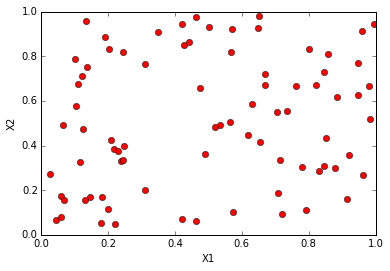

In [41]:
plt.plot(x1_train,x2_train, 'ro')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

\vspace{5mm}
One of important thing in K-Means is the choice of the number of clusters K. There are many statistical methods that help
to solve ths problem, i have found very simple statistics for plotting the Elbow curve. In practice we compute the average of the sum of the square of the distance for every K ; and we 'll choose K for which the curve starts flattening
out ( the Elbow point ) .
\vspace{5mm}

In [42]:
X = np.matrix([x1_train,x2_train])
X = np.transpose(X)
K = range(1,10)
KM = [kmeans(X,k) for k in K]
euclidean_centroid = [cdist(X, centroid, 'euclidean') for(centroid,var) in KM]
dist = [np.min(D,axis=1) for D in euclidean_centroid]
avgWithinSS = [sum(d)/len(X) for d in dist]
centers = KM[3][0]

\vspace{5mm}
Now we'll plot the result and we can see how to choose K.
\vspace{5mm}

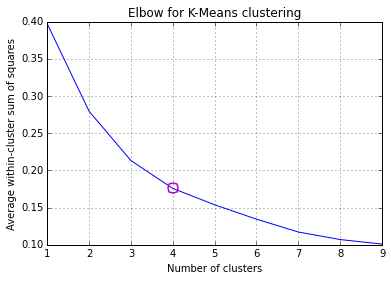

In [43]:
kIdx = 3
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=10,
markeredgewidth=1.5, markeredgecolor='m', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
tt = plt.title('Elbow for K-Means clustering')

\vspace{5mm}
So we'll choose K = 4
\vspace{5mm}

Now we compute the optimization procedure to the quadratic convex function of the only variable w so i'll use only the BFGS for this problem because is much more simple from the optimization point of view than in the supervised problem. Like in before we set the regularization parameter respectively to 0.01,2 and 20. 

\vspace{5mm}
µ = 0.01

In [44]:
function_1 = lambda w,centers,x1_train,x2_train,y_train: 0.5*(np.sum(((w[0]*(np.exp
(-1*(np.sqrt((x1_train-centers[0][0])**2 + (x2_train-centers[0][1])**2))**2)) + w[1]*(np.exp
(-1*(np.sqrt((x1_train-centers[1][0])**2 + (x2_train-centers[1][1])**2))**2)) + w[2]*(np.exp
(-1*(np.sqrt((x1_train-centers[2][0])**2 + (x2_train-centers[2][1])**2))**2)) + w[3]*(np.exp
(-1*(np.sqrt((x1_train-centers[3][0])**2 + (x2_train-centers[3][1])**2))**2)))- y_train)**2)) + \
0.005*(w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

start = timer()
opt_result = minimize(function_1,x0=(0,0,0,0),args=(centers,x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 10
     nfev: 60
 hess_inv: array([[ 2.2121613 , -2.040147  , -3.05320189,  2.7165647 ],
       [-2.040147  ,  2.14833015,  2.98246241, -2.9052212 ],
       [-3.05320189,  2.98246241,  4.73210542, -4.39242779],
       [ 2.7165647 , -2.9052212 , -4.39242779,  4.32884619]])
      fun: 3.4128315641619262
        x: array([-1.1707274 ,  2.39728768,  1.22930457, -1.11421451])
  message: 'Optimization terminated successfully.'
      jac: array([  5.96046448e-08,   1.19209290e-07,   2.98023224e-08,
         2.98023224e-08])
0.0200660228729


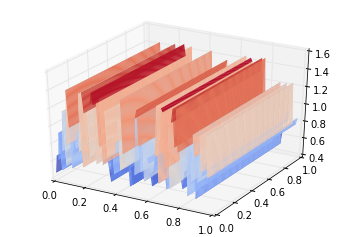

.


In [71]:
w = np.array([-1.1707274,2.39728768,1.22930457,-1.11421451])
estimated_y = lambda w,x1,x2: (w[0]*(np.exp
(-1*(np.sqrt((x1-centers[0][0])**2 + (x2-centers[0][1])**2))**2)) + w[1]*(np.exp
(-1*(np.sqrt((x1-centers[1][0])**2 + (x2-centers[1][1])**2))**2)) + w[2]*(np.exp
(-1*(np.sqrt((x1-centers[2][0])**2 + (x2-centers[2][1])**2))**2)) + w[3]*(np.exp
(-1*(np.sqrt((x1-centers[3][0])**2 + (x2-centers[3][1])**2))**2)))
print plot_(estimated_y(w,x1,x2))

In [72]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y(w,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y(w,x1_test,x2_test)))

the training error is 0.0840870072833
the test error is 0.122036750948


\vspace{5mm}
µ = 2

In [73]:
function_2 = lambda w,centers,x1_train,x2_train,y_train: 0.5*(np.sum(((w[0]*(np.exp(-1*(np.sqrt((x1_train-centers[0][0])**2
+ (x2_train-centers[0][1])**2))**2)) + w[1]*(np.exp(-1*(np.sqrt((x1_train-centers[1][0])**2 
+ (x2_train-centers[1][1])**2))**2)) + w[2]*(np.exp(-1*(np.sqrt((x1_train-centers[2][0])**2
+ (x2_train-centers[2][1])**2))**2)) + w[3]*(np.exp(-1*(np.sqrt((x1_train-centers[3][0])**2 
+ (x2_train-centers[3][1])**2))**2)))- y_train)**2)) + (w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

start = timer()
opt_result = minimize(function_2,x0=(0,0,0,0),args=(centers,x1_train,x2_train,y_train))
end = timer()
print opt_result
print (end - start)

   status: 0
  success: True
     njev: 9
     nfev: 54
 hess_inv: array([[ 0.2431912 , -0.15114798, -0.20656241,  0.1104472 ],
       [-0.15114798,  0.24749046,  0.17818354, -0.25170138],
       [-0.20656241,  0.17818354,  0.42400691, -0.37052979],
       [ 0.1104472 , -0.25170138, -0.37052979,  0.49113079]])
      fun: 5.279529943999409
        x: array([ 0.0386186 ,  1.04633385, -0.18187921,  0.32622776])
  message: 'Optimization terminated successfully.'
      jac: array([  4.17232513e-07,   4.17232513e-07,   4.76837158e-07,
         4.76837158e-07])
0.0162901878357


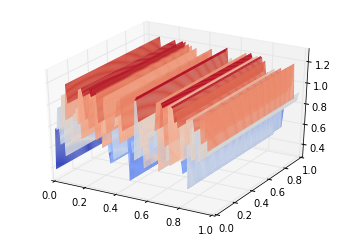

.


In [74]:
w = np.array([0.0386186,1.04633385,-0.18187921,0.32622776])
print plot_(estimated_y(w,x1,x2))

In [75]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y(w,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y(w,x1_test,x2_test)))

the training error is 0.101092985591
the test error is 0.112576823728


\vspace{5mm}
µ = 20

In [76]:
function_3 = lambda w,centers,x1_train,x2_train,y_train: 0.5*(np.sum(((w[0]*(np.exp(-1*(np.sqrt((x1_train-centers[0][0])**2
+ (x2_train-centers[0][1])**2))**2)) + w[1]*(np.exp(-1*(np.sqrt((x1_train-centers[1][0])**2 
+ (x2_train-centers[1][1])**2))**2)) + w[2]*(np.exp(-1*(np.sqrt((x1_train-centers[2][0])**2
+ (x2_train-centers[2][1])**2))**2)) + w[3]*(np.exp(-1*(np.sqrt((x1_train-centers[3][0])**2 
+ (x2_train-centers[3][1])**2))**2)))- y_train)**2)) + 10*(w[0]**2 + w[1]**2 + w[2]**2 + w[3]**2)

opt_result = minimize(function_3,x0=(0,0,0,0),args=(centers,x1_train,x2_train,y_train))
print opt_result

   status: 0
  success: True
     njev: 10
     nfev: 60
 hess_inv: array([[ 0.03508582, -0.01030249, -0.0111677 , -0.00877021],
       [-0.01030249,  0.03323772, -0.00594503, -0.01070949],
       [-0.0111677 , -0.00594503,  0.03470336, -0.01238417],
       [-0.00877021, -0.01070949, -0.01238417,  0.03536553]])
      fun: 10.427648833336068
        x: array([ 0.22320456,  0.47092147,  0.12418807,  0.28581109])
  message: 'Optimization terminated successfully.'
      jac: array([  0.00000000e+00,  -1.19209290e-07,  -1.19209290e-07,
        -1.19209290e-07])


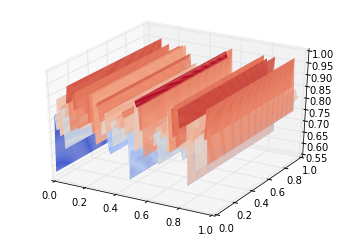

.


In [77]:
w = np.array([0.22320456,0.47092147,0.12418807,0.28581109])
print plot_(estimated_y(w,x1,x2))

In [78]:
print 'the training error is '+str(mean_squared_error(y_train,estimated_y(w,x1_train,x2_train)))
print 'the test error is '+str(mean_squared_error(y_test,estimated_y(w,x1_test,x2_test)))

the training error is 0.168516730231
the test error is 0.111635538331


\vspace{5mm}

For evaluate the test and training error we can plot all the errors:
\vspace{5mm}

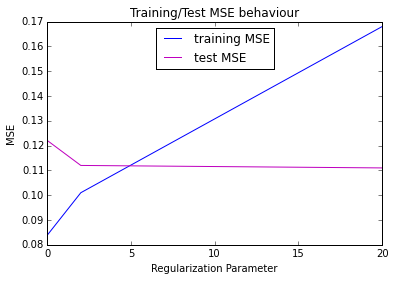

In [84]:
reg_par = [0.01, 2.0, 20]
train_mse = [0.084, 0.101, 0.168]
test_mse = [0.122, 0.112,0.111]
plt.plot(reg_par,train_mse,label='training MSE')
plt.plot(reg_par,test_mse,color='m', label='test MSE')
plt.xlabel('Regularization Parameter')
plt.ylabel('MSE')
plt.title('Training/Test MSE behaviour')
plt.legend(loc = 'upper center')
plt.show()

\vspace{5mm}
Setting approprately the regularization parameter we can improve the generalization property of the model, the training error increase because also the penalization term increase.
